# SPECTRA STUDIES

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec

import photopeak_fit as pk

In [2]:
# Plotting style
default_cmap = "viridis"
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams[  "image.cmap"  ]  = default_cmap
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
#plt.rcParams["axes.grid"     ]  = True
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

#set number of bins
nbins = 100

In [3]:
def plottext(res, cov, n):
    mus, smus = int(round(res.x[0])), int(round(cov[0][0]**.5))
    mub, smub = int(round(res.x[1])), int(round(cov[1][1]**.5))
    s, ss     = res.x[2], cov[2][2]**.5
    mu, smu   = int(round(res.x[3])), int(round(cov[3][3]**.5))
    sig, ssig = int(round(res.x[4])), int(round(cov[4][4]**.5))

    tres = (fr'$\mu_s    = {mus}\pm{smus}$' + '\n' +
            fr'$\mu_b    = {mub}\pm{smub}$' + '\n' +
            fr'$E_{{ph}} = {mu} \pm {smu}$' + '\n' +
            fr'$\sigma   = {sig} \pm {ssig}$' + '\n'+
            fr'Total Entries: {n}')
    return tres


def fitplot(E, lims, res, cov, nbins):
    a, b =lims
    fig = plt.figure()
    ax = fig.add_subplot(111)

    h, _, _ = ax.hist(E, bins=int(nbins), alpha=0.5, histtype='step', color='darkblue', linewidth=2);
    e = np.linspace(a, b, 1000)
    ax.plot(e, ((b-a)/nbins*len(E))*pk.pkpdf(e, res.x, [a,b]), c='black')

    ax.text(a, h.max()/2., s=plottext(res, cov, len(E)))

    ax.set_xlabel('Energy (pes)');
    ax.set_ylabel('Entries');

In [4]:
run = 6484

directory = './DATA/'
filename  = f'cepks_{run}_0000_11999_6q0min.h5'

data = pd.HDFStore(directory + filename)['/esum']

In [5]:
data.keys()
pes=[]
peserr=[]

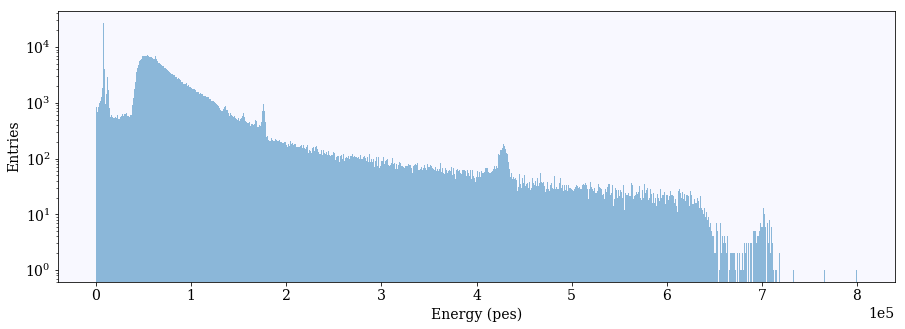

In [6]:
E = data[(data['e']<8e5)]['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(10*nbins), log=True, alpha=0.5);
ax.set_xlabel('Energy (pes)');
ax.set_ylabel('Entries');

# Th photopeak

In [7]:
a, b = 6.6e5, 7.3e5

thpk = data[(a<data['e'])&(data['e']<b)]

In [8]:
E = thpk['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)


Optimization terminated successfully.
         Current function value: 3161.869777
         Iterations: 10
         Function evaluations: 1173


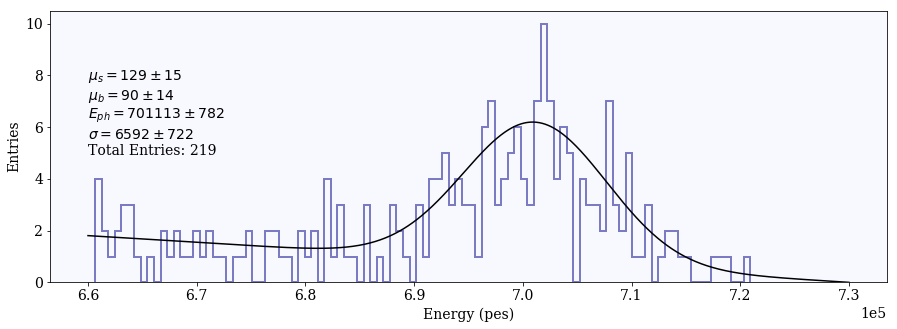

In [9]:
fitplot(E, [a, b], res, cov, nbins)

# Th double escape

In [10]:
a, b = 4.1e5, 4.45e5

thds = data[(a<data['e'])&(data['e']<b)]

In [11]:
E = thds['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 55470.237623
         Iterations: 16
         Function evaluations: 1832


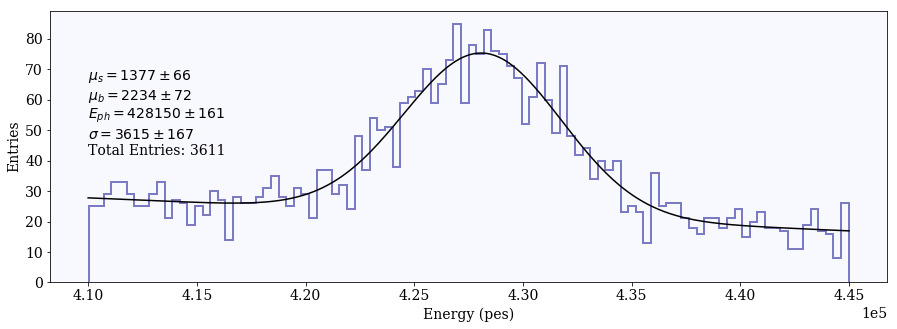

In [12]:
fitplot(E, [a, b], res, cov, nbins)

# Cs photopeak

In [13]:
a, b = 1.65e5, 1.9e5

cspk = data[(a<data['e'])&(data['e']<b)]

In [14]:
E = cspk['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 185635.360752
         Iterations: 19
         Function evaluations: 2058


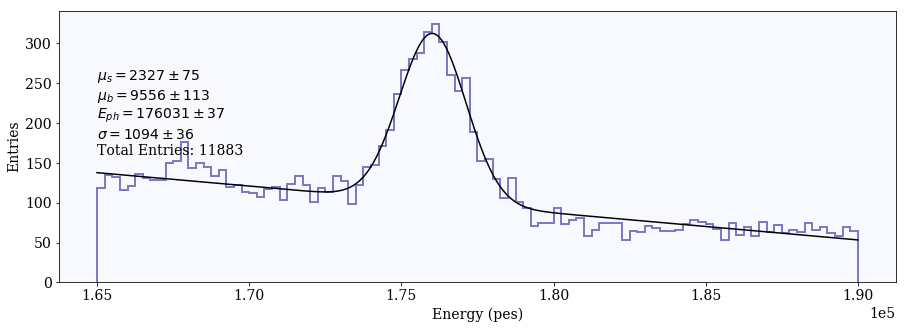

In [15]:
fitplot(E, [a, b], res, cov, nbins)

# Tl peaks

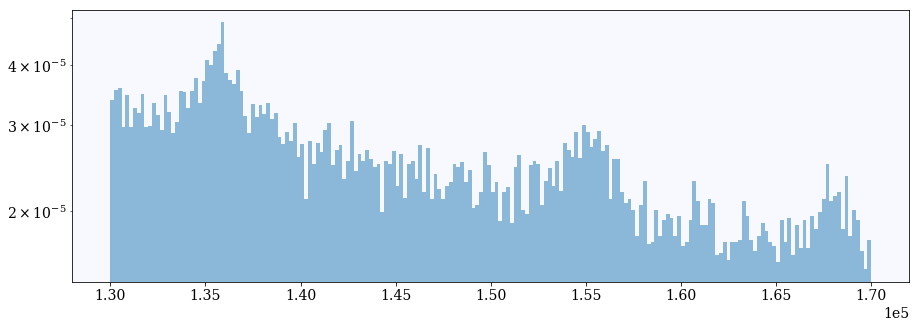

In [16]:
a, b = 1.3e5, 1.7e5

preg = data[(a<data['e'])&(data['e']<b)]
E = preg['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(2*nbins), log=True, alpha=0.5, density=True);

## Peak 1

In [17]:
a, b = 1.5e5, 1.6e5

pe1 = data[(a<data['e'])&(data['e']<b)]
E = pe1['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 94648.081146
         Iterations: 11
         Function evaluations: 1002


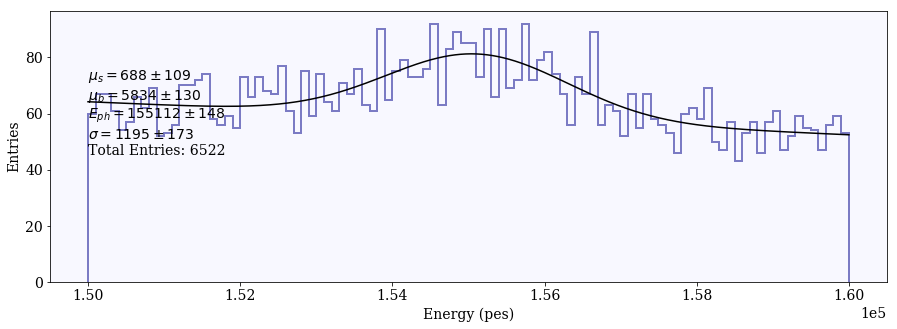

In [18]:
fitplot(E, [a, b], res, cov, nbins)

## Peak 2

In [19]:
a, b = 1.3e5, 1.4e5

xray = data[(a<data['e'])&(data['e']<b)]
E = xray['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 140721.102709
         Iterations: 16
         Function evaluations: 1645


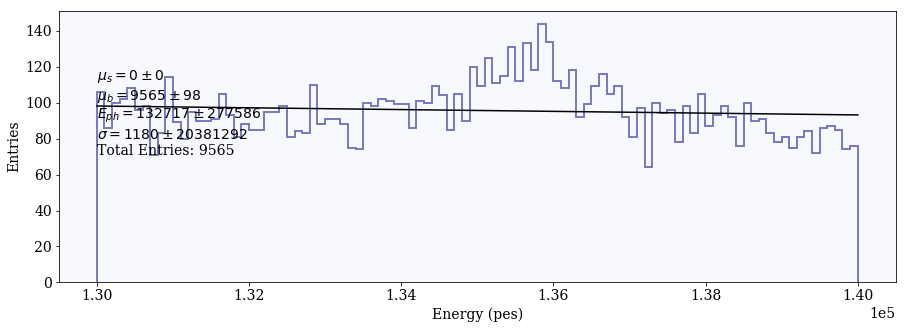

In [20]:
fitplot(E, [a, b], res, cov, nbins)

# 212Pb

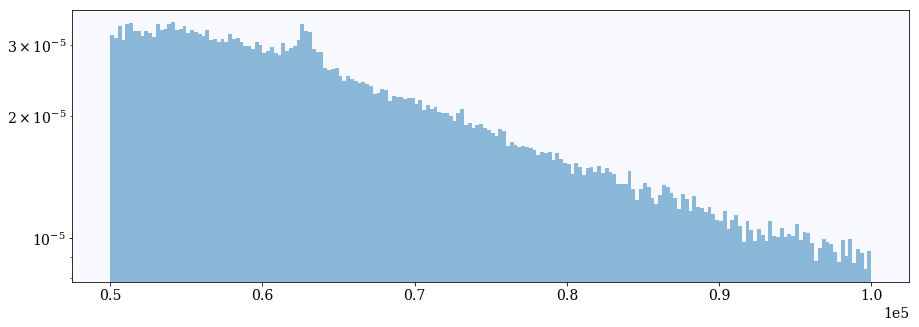

In [21]:
a, b = 0.5e5, 1e5

xray = data[(a<data['e'])&(data['e']<b)]
E = xray['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(2*nbins), log=True, alpha=0.5, density=True);

In [22]:
a, b = .58e5, .68e5

unk = data[(a<data['e'])&(data['e']<b)]
E = unk['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 1167589.122003
         Iterations: 18
         Function evaluations: 1532


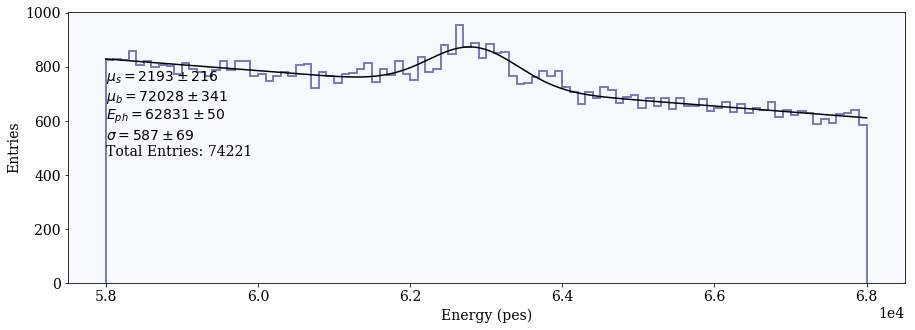

In [23]:
fitplot(E, [a, b], res, cov, nbins)

# Kr

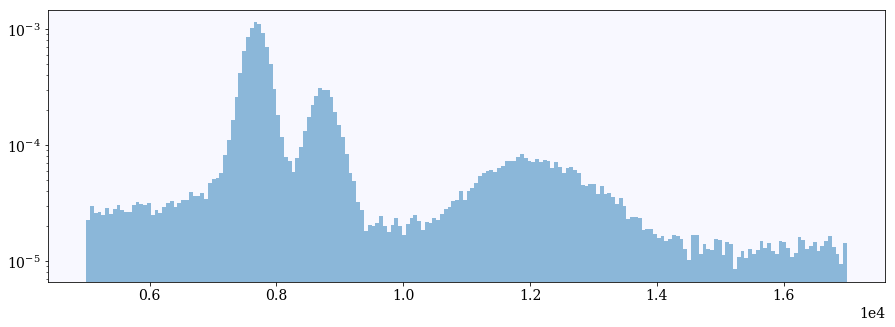

In [24]:
a, b = 0.05e5, 0.17e5

xray = data[(a<data['e'])&(data['e']<b)]
E = xray['e']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(E, bins=int(2*nbins), log=True, alpha=0.5, density=True);

In [25]:
a, b = .1e5, .16e5

kr = data[(a<data['e'])&(data['e']<b)]
E = kr['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 162139.183861
         Iterations: 19
         Function evaluations: 1565


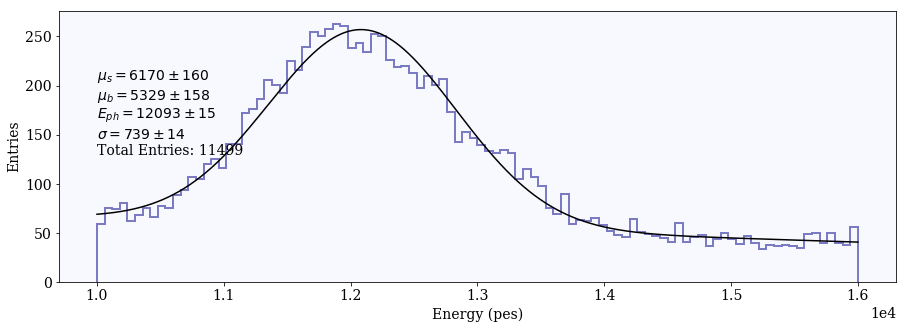

In [26]:
fitplot(E, [a, b], res, cov, nbins)

# XRays

## XRay 1

In [27]:
a, b = .083e5, .1e5

kr = data[(a<data['e'])&(data['e']<b)]
E = kr['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

Optimization terminated successfully.
         Current function value: 126350.279238
         Iterations: 18
         Function evaluations: 1330


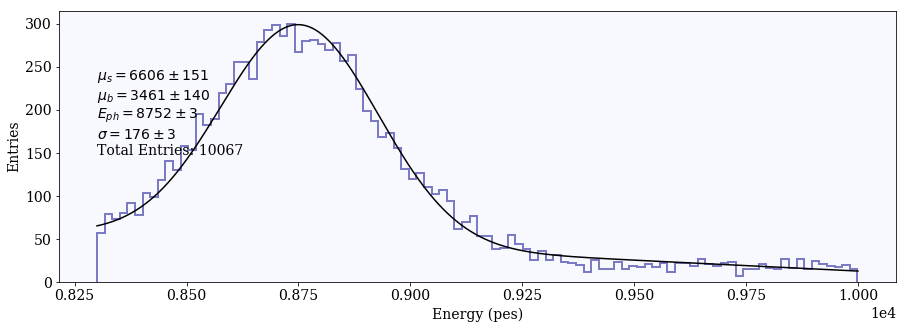

In [28]:
fitplot(E, [a, b], res, cov, nbins)

## XRay 2

In [29]:
a, b = .065e5, .083e5

kr = data[(a<data['e'])&(data['e']<b)]
E = kr['e']

#fit 
x0 = np.array([.5*len(E), .5*len(E), 0, np.mean(E), np.std(E)])
res, cov = pk.pkfit(E, [a,b], x0=x0)

pes.append(res.x[3])
peserr.append(cov[3][3]**.5)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/scipy/optimize/optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


Optimization terminated successfully.
         Current function value: 393306.758175
         Iterations: 47
         Function evaluations: 3495


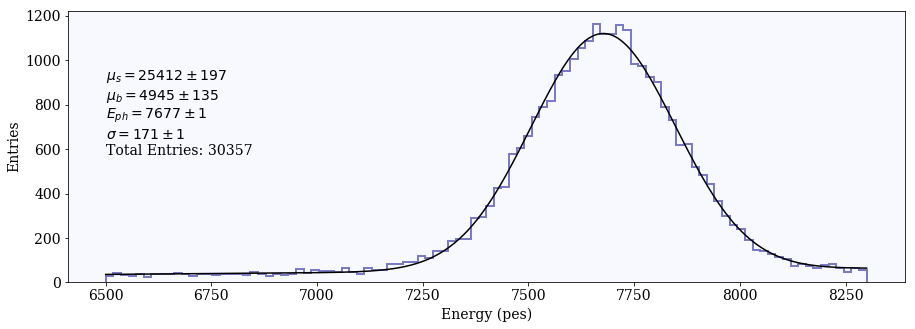

In [30]:
fitplot(E, [a, b], res, cov, nbins)

# Calibration line

In [31]:
pt = ['Thpk', 'Thde', 'Cs', 'CsXRay' , 'Peak1', 'Peak2', 'Unknown', 'Kr' 'XRay1', 'XRay2']

pes    = np.array(pes)
peserr = np.array(peserr)


kev = np.array([2614.5, 1592.5, 661.7, 583.2, 510.8, 238.6, 41.5, 34.0, 29.7])

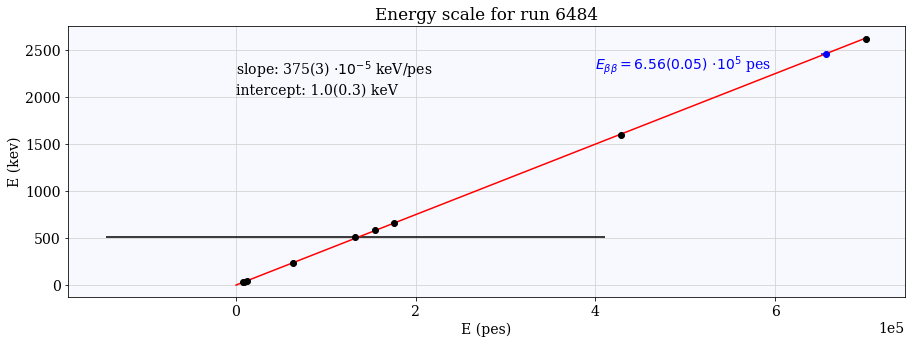

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f'Energy scale for run {run}')

parms, cov = np.polyfit(kev, pes, 1, w=1/peserr, cov=True)
p, c = parms
perr, cerr = cov[0,0]**0.5, cov[1,1]**0.5

ax.errorbar(pes, kev, xerr=peserr, fmt='o', markersize=6, color='black');
perr, cerr = perr/p**2, ((cerr/p)**2 + (c*perr/p**2)**2)**0.5;
p, c = 1/p, -c/p

e=np.linspace(0, pes.max())
ax.plot(e, p*e + c, c='r');

tx = (fr'slope: {int(round(10**5*p))}({int(round(10**5*perr))}) $\cdot 10^{{-5}}$ keV/pes'+'\n'+
                        fr'intercept: {round(c,1)}({round(cerr,1)}) keV')
ax.text(0, 2.05e3, s=tx)


Qbb=2457.8
val = (1/p)*(Qbb-c)
er  = ((perr*(Qbb-c)/p**2)**2 + (cerr/p)**2)**0.5
tx = (fr'$E_{{\beta\beta}}={round(val*10**-5, 2)}({round(er*10**-5, 2)})$ $\cdot 10^{{5}}$ pes' ) 
ax.text(4e5, 2.3e3, s=tx, color='b')
ax.errorbar(val, Qbb, xerr=er, fmt='o', markersize=6, color='b')


ax.grid()
ax.set_xlabel('E (pes)');
ax.set_ylabel('E (kev)');

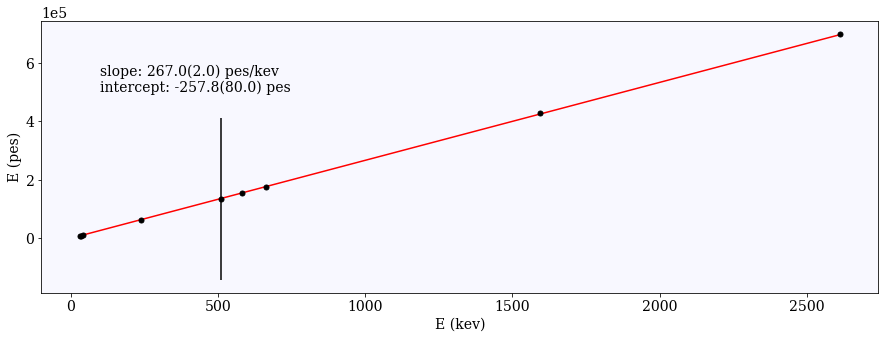

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

parms, cov = np.polyfit(kev, pes, 1, w=1/peserr, cov=True)
p, c = parms
perr, cerr = cov[0,0]**0.5, cov[1,1]**0.5

ax.errorbar(kev, pes, yerr=peserr, fmt='o', markersize=5, color='black');
ax.plot(kev, p*kev + c, c='r');

tx = (fr'slope: {round(p)}({round(perr, 1)}) pes/kev'+'\n'+
                    fr'intercept: {round(c,1)}({round(cerr,1)}) pes')
ax.text(1e2, 5e5, s=tx)

ax.set_ylabel('E (pes)');
ax.set_xlabel('E (kev)');

In [34]:
Qbb=2457.8

val = p*Qbb + c
er  = ((Qbb*perr)**2 + cerr**2)**.5

print(val, er)

656012.0738602689 5024.93026000724
